Initial exploratory analyses of demographic data

In [2]:
import os,sys
import pandas,numpy
import seaborn as sns
import matplotlib.pyplot as plt

# this is kludgey but it works
sys.path.append('../utils')

from metadata_utils import load_metadata
from utils import get_info

%matplotlib inline

%load_ext rpy2.ipython
from IPython.display import display, HTML
pandas.set_option('max_colwidth', 100)


dataset='Discovery_9-26-16'
basedir=get_info('base_directory')
derived_dir=os.path.join(basedir,'data/Derived_Data/%s'%dataset)



/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
demog_all=pandas.read_csv(os.path.join(derived_dir,'surveydata/demographics.tsv'),delimiter='\t',index_col=0)
demog=demog_all.copy()
print(demog.WeightPounds.min())
demog_metadata=load_metadata('demographics')
del demog['RelationshipStatus']
del demog['RentOwn']
demog['WeightPounds'][demog['WeightPounds']<80]=numpy.nan
demog['HeightInches'][demog['HeightInches']<36]=numpy.nan


demog['BMI']=demog['WeightPounds']*0.45 / (demog['HeightInches']*0.025)**2
demog.describe().T

20


/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Sex,200.0,0.500000,0.501255,0.000000,0.0,0.5,1.0,1.000000
Age,200.0,33.040000,7.381792,20.000000,27.0,32.0,37.0,59.000000
HispanicLatino,200.0,0.055000,0.228552,0.000000,0.0,0.0,0.0,1.000000
HighestEducation,200.0,3.420000,0.909801,1.000000,3.0,3.0,4.0,6.000000
HeightInches,199.0,67.557789,4.236139,50.000000,NaN,NaN,NaN,78.000000
WeightPounds,199.0,180.944724,49.000226,100.000000,NaN,NaN,NaN,360.000000
DivorceCount,200.0,0.125000,0.400220,0.000000,0.0,0.0,0.0,3.000000
LongestRelationship,200.0,79.300000,71.158892,0.000000,24.0,60.0,122.5,357.000000
RelationshipNumber,200.0,3.275000,1.568975,0.000000,2.0,3.0,5.0,6.000000
ChildrenNumber,200.0,0.795000,1.229035,0.000000,0.0,0.0,2.0,5.000000


In [21]:
print('Percentage with children: %0.1f'%(numpy.mean(demog.ChildrenNumber>1)*100))
print('Percentage ever divorced: %0.1f'%(numpy.mean(demog.DivorceCount>0)*100))


print('Percentage with current gambling problem: %0.1f'%(numpy.mean(demog.GamblingProblem>1)*100))

print('Percentage with at least one traffic ticket in last year: %0.1f'%(numpy.mean(demog.TrafficTicketsLastYearCount>0)*100))


print('Percentage arrested at least once: %0.1f'%(numpy.mean(demog.ArrestedChargedLifeCount>0)*100))
print('Percentage arrested more than once: %0.1f'%(numpy.mean(demog.ArrestedChargedLifeCount>1)*100))
print('Percentage with >$10,000 credit card debt: %0.1f'%(numpy.mean(demog.CreditCardDebt>3)*100))




Percentage with children: 25.5
Percentage ever divorced: 10.5
Percentage with current gambling problem: 1.5
Percentage with at least one traffic ticket in last year: 8.5
Percentage arrested at least once: 16.5
Percentage arrested more than once: 8.0
Percentage with >$10,000 credit card debt: 7.0


0.33 percent subjects with BMI>30 (obese)
0.08 percent subjects with BMI>40 (extreme obesity)


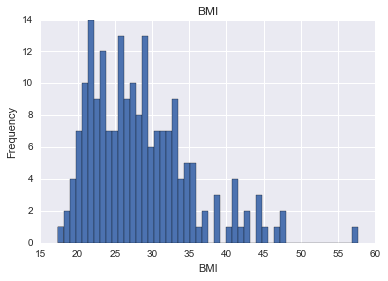

In [6]:
demog.BMI.hist(bins=50)
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
print('%0.2f percent subjects with BMI>30 (obese)'%numpy.mean(demog.BMI>30))
print('%0.2f percent subjects with BMI>40 (extreme obesity)'%numpy.mean(demog.BMI>40))

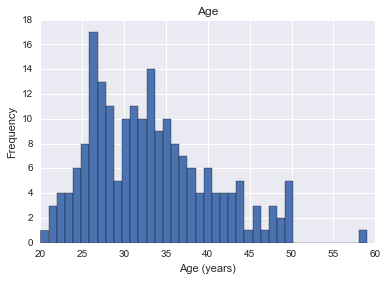

In [7]:
demog.Age.hist(bins=40)
plt.title('Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

In [8]:
demog.corr()



,Sex,Age,HispanicLatino,HighestEducation,HeightInches,WeightPounds,DivorceCount,LongestRelationship,RelationshipNumber,ChildrenNumber,...,CoffeeCupsPerDay,TeaCupsPerDay,CaffienatedSodaCansPerDay,CaffieneOtherSourcesDayMG,GamblingProblem,TrafficTicketsLastYearCount,TrafficAccidentsLifeCount,ArrestedChargedLifeCount,OtherDebtAmount,BMI
Sex,1.000000,0.129018,-0.065795,-0.022038,-0.588019,-0.225875,0.187867,0.327835,0.022364,0.248785,...,0.008077,0.008131,0.099421,-0.086495,-0.193568,-0.110269,0.031583,-0.182502,0.140204,0.049638
Age,0.129018,1.000000,-0.108537,0.016940,-0.013698,0.134576,0.367401,0.504843,0.356128,0.337117,...,0.191034,0.028820,0.081366,-0.082685,0.102633,-0.042267,0.326320,0.089792,-0.026512,0.173356
HispanicLatino,-0.065795,-0.108537,1.000000,-0.111649,-0.052747,0.047064,0.034335,-0.085680,-0.014364,-0.066996,...,-0.088957,0.026725,0.034892,-0.011559,-0.046587,0.091505,-0.056339,-0.085006,0.086897,0.076618
HighestEducation,-0.022038,0.016940,-0.111649,1.000000,0.012611,-0.139977,-0.048303,-0.057920,0.080616,-0.097880,...,0.055058,-0.142226,-0.072912,-0.064675,0.067242,-0.006396,0.008578,-0.132588,0.032432,-0.145027
HeightInches,-0.588019,-0.013698,-0.052747,0.012611,1.000000,0.476738,-0.071169,-0.128386,-0.037382,-0.036899,...,-0.099664,0.100344,-0.034639,0.099734,0.071439,0.065568,-0.016393,0.069078,-0.097842,-0.008858
WeightPounds,-0.225875,0.134576,0.047064,-0.139977,0.476738,1.000000,0.015515,0.035572,-0.026099,0.108926,...,-0.033976,0.202516,0.101815,-0.048790,0.112274,0.046387,0.056249,0.079037,0.062019,0.866117
DivorceCount,0.187867,0.367401,0.034335,-0.048303,-0.071169,0.015515,1.000000,0.224531,0.241079,0.256679,...,0.118102,-0.012647,0.007342,-0.049661,-0.016712,0.063807,0.092408,-0.022509,0.092314,0.058627
LongestRelationship,0.327835,0.504843,-0.085680,-0.057920,-0.128386,0.035572,0.224531,1.000000,0.113671,0.421992,...,0.095007,-0.006257,-0.023683,-0.066174,-0.117008,-0.022030,0.123774,-0.045868,0.195946,0.104041
RelationshipNumber,0.022364,0.356128,-0.014364,0.080616,-0.037382,-0.026099,0.241079,0.113671,1.000000,0.042412,...,0.213561,-0.008634,-0.023975,-0.049217,0.000787,-0.055106,0.368899,0.148786,-0.023346,-0.000132
ChildrenNumber,0.248785,0.337117,-0.066996,-0.097880,-0.036899,0.108926,0.256679,0.421992,0.042412,1.000000,...,0.102424,-0.024517,0.130975,0.027192,-0.096818,-0.052977,0.082892,-0.011980,-0.015029,0.142989


### Health status

For the psychological state variables, I binarize them so that the mean expresses the proportion of subjects reporting any level of these symptoms.

In [9]:
health_metadata=load_metadata('health')
healthdata=pandas.read_csv(os.path.join(derived_dir,'surveydata/health.tsv'),delimiter='\t',index_col=0)
symptoms=['Nervous','Hopeless','RestlessFidgety','Depressed','EverythingIsEffort','Worthless']
for s in symptoms:
    healthdata[s]=(healthdata[s]>1).astype('int')

d=healthdata.describe().T
itemtext=[health_metadata[i]['Description'] for i in d.index]

d['Itemtext']=itemtext
display(d)

/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max,Itemtext
Nervous,200.0,0.315000,0.465682,0.0,0.0,0.0,1.0,1.0,... nervous?
Hopeless,200.0,0.270000,0.445074,0.0,0.0,0.0,1.0,1.0,... hopeless?
RestlessFidgety,200.0,0.365000,0.482638,0.0,0.0,0.0,1.0,1.0,... restless or fidgety?
Depressed,200.0,0.265000,0.442441,0.0,0.0,0.0,1.0,1.0,... so depressed that nothing could cheer you up?
EverythingIsEffort,200.0,0.390000,0.488974,0.0,0.0,0.0,1.0,1.0,... that everything was an effort?
Worthless,200.0,0.270000,0.445074,0.0,0.0,0.0,1.0,1.0,... worthless?
Last30DaysUsual,200.0,3.190000,0.953122,0.0,3.0,3.0,4.0,6.0,Q2: The last six questions asked about feelings that might have occurred during the past 30\nday...
DaysLostLastMonth,149.0,1.577181,3.361509,-2.0,NaN,NaN,NaN,20.0,"Q3: During the past 30 days, how many days out of 30 were you totally unable to work or\ncarry o..."
DaysHalfLastMonth,153.0,2.111111,3.693087,-1.0,NaN,NaN,NaN,20.0,"Q4: Not counting the days you reported in response to Q3, how many days in the past\n30 were you..."
DoctorVisitsLastMonth,166.0,0.060241,0.512851,-3.0,NaN,NaN,NaN,4.0,"Q5: During the past 30 days, how many times did you see a doctor or other health\nprofessional a..."


### Medical diagnoses

In [10]:
disorders=healthdata['DiseaseDiagnoses'].unique()
ddata=[]
for d in disorders:
    diag=healthdata.query('DiseaseDiagnoses=="%s"'%d)
    ddata.append([d.lstrip(),diag.shape[0]/healthdata.shape[0]])
df=pandas.DataFrame(ddata,columns=['Diagnosis','Frequency(Percent)'])
display(df)

,Diagnosis,Frequency(Percent)
0,None,0.820
1,High Blood Pressure,0.060
2,Type II diabetes,0.030
3,Stroke,0.005
4,Other,0.075
5,Sleep Apnea,0.005
6,Cancer,0.005


### Psychiatric diagnoses

In [11]:
disorders=healthdata['PsychDiagnoses'].unique()
ddata=[]
for d in disorders:
    diag=healthdata.query('PsychDiagnoses=="%s"'%d)
    ddata.append([d.lstrip(),diag.shape[0]/healthdata.shape[0]])
df=pandas.DataFrame(ddata,columns=['Diagnosis','Frequency(Percent)'])
display(df)

,Diagnosis,Frequency(Percent)
0,Depression,0.200
1,None,0.635
2,ADHD,0.030
3,Obessive Compulsive Disorder,0.010
4,Anxiety Disorder,0.070
5,Alcohol Dependency,0.005
6,Schizophrenia,0.005
7,Anorexi Nervosa,0.020
8,Manic-Depressive (Bilpolar) illness,0.005
9,Drug Dependency,0.010


### Alcohol/Drug use

In [12]:
drug_metadata=load_metadata('alcohol_drugs')
drugdata=pandas.read_csv(os.path.join(derived_dir,'surveydata/alcohol_drugs.tsv'),delimiter='\t',index_col=0)
d=drugdata.describe().T
itemtext=[drug_metadata[i]['Description'] for i in d.index]

d['Itemtext']=itemtext
display(d)

/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max,Itemtext
LifetimeSmoke100Cigs,200.0,0.500000,0.501255,0.0,0.0,0.5,1.0,1.0,"Altogether, have you smoked at least 100 or more cigarettes in your entire lifetime?"
HowLongSmoked,200.0,2.845000,3.135303,0.0,0.0,1.0,6.0,7.0,How long have you smoked (cumulatively)?
SmokeEveryDay,200.0,0.905000,1.234339,0.0,0.0,0.0,2.0,3.0,"Do you now smoke cigarettes every day, some days or not at all?"
CigsPerDay,200.0,0.980000,1.707094,0.0,0.0,0.0,2.0,6.0,"On average, how many cigarettes do you now smoke a day (1 pack = 20 cigarettes)?"
HowSoonSmokeAfterWaking,200.0,0.735000,1.365319,0.0,0.0,0.0,1.0,5.0,How soon after you wake up do you smoke your first cigarette?
AlcoholHowOften,200.0,1.560000,1.154584,0.0,1.0,1.0,2.0,4.0,How often do you have a drink containing alcohol?
AlcoholHowManyDrinksDay,200.0,1.550000,0.855076,1.0,1.0,1.0,2.0,5.0,How many drinks containing alcohol do you have on a typical day when you are drinking?
AlcoholHowOften6Drinks,200.0,0.620000,0.899805,0.0,0.0,0.0,1.0,4.0,How often do you have six or more drinks on one occasion?
HowOftenCantStopDrinking,200.0,0.280000,0.744562,0.0,0.0,0.0,0.0,4.0,How often during the last year have you found that you were not able to stop drinking once you h...
HowOftenFailedActivitiesDrinking,200.0,0.170000,0.531519,0.0,0.0,0.0,0.0,3.0,How often during the last year have you failed to do what was normally expected from you because...


In [25]:
print('Percentage of lifetime smokers (100 cigs): %0.2f'%(100*numpy.mean(drugdata.LifetimeSmoke100Cigs>0)))

print('Percentage of current smokers: %0.2f'%(100*numpy.mean(drugdata.CigsPerDay>0)))
print('Percentage of cannabis users (at all): %0.2f'%(100*numpy.mean(drugdata.CannabisHowOften>0)))
print('Percentage of cannabis users (at least once/month): %0.2f'%(100*numpy.mean(drugdata.CannabisHowOften>1)))
print('Percentage of daily cannabis users: %0.2f'%(100*numpy.mean(drugdata.CannabisHowOften>3)))
q=drugdata.query('AlcoholHowOften>3 & AlcoholHowManyDrinksDay>1')
print('Percentage of heavy drinkers (4+ times per week, 3+ drinks per time): %0.2f'%(100*float(q.shape[0]/drugdata.shape[0])))
print('Percentage reporting trouble stopping their drinking: %0.2f'%(100*numpy.mean(drugdata.HowOftenCantStopDrinking>3)))







Percentage of lifetime smokers (100 cigs): 50.00
Percentage of current smokers: 29.00
Percentage of cannabis users (at all): 23.00
Percentage of cannabis users (at least once/month): 12.50
Percentage of daily cannabis users: 7.00
Percentage of heavy drinkers (4+ times per week, 3+ drinks per time): 6.50
Percentage reporting trouble stopping their drinking: 1.50


In [14]:
print('Cigarettes smoked per day')
cigdata=[]
for i in drug_metadata['CigsPerDay']['Levels']:
    q=drugdata.query('CigsPerDay == %d'%float(i))
    cigdata.append([int(i),drug_metadata['CigsPerDay']['Levels'][i],q.shape[0]])
df=pandas.DataFrame(cigdata,columns=['Resp','Frequency','Proportion'])
df=df.sort_values(by='Resp')
display(df)

Cigarettes smoked per day


,Resp,Frequency,Proportion
1,0,I don't smoke,142
5,1,Less than a cigarette a day,7
4,2,<5,10
0,3,5-10,11
2,4,10-20,15
3,5,1 pack,14
7,6,2 packs,1
6,7,More than 2 packs,0


### QA analyses for demographic data

The files are saved as PDF rather than printed, to make them easier to look at in high resolution, since Jupyter doesn't do a great job of displaying R output.

In [15]:
%%R -i cdata,varnames
library(psych)
df=data.frame(cdata)
names(df)=varnames
pdf(file='pairs_panels_demographics.pdf',width=16,height=16)

for (i in 1:4){
    st=(i-1)*10+1
    en=min(length(varnames),i*10)
    pairs.panels(df[,st:en])
}
dev.off()

pdf(file=sprintf('qqplots_demographics.pdf',i),width=6,height=6)


for (i in 1:length(varnames)){
    qqnorm(df[,i],main=varnames[i])
    qqline(df[,i])
}
dev.off()





NameError: name 'cdata' is not defined

### Factor analyses of demographic/health data


In [ ]:
demog_ord=pandas.read_csv(os.path.join(derived_dir,'surveydata/demographics_ordinal.tsv'),delimiter='\t',index_col=0)
demog_ord['BMI']=demog_ord['WeightPounds']*0.45 / (demog_ord['HeightInches']*0.025)**2
del demog_ord['WeightPounds']
del demog_ord['HeightInches']

healthdata_ord=pandas.read_csv(os.path.join(derived_dir,'surveydata/health_ordinal.tsv'),delimiter='\t',index_col=0)
drugdata_ord=pandas.read_csv(os.path.join(derived_dir,'surveydata/alcohol_drugs_ordinal.tsv'),delimiter='\t',index_col=0)

all_data=demog_ord.merge(healthdata_ord,left_index=True,right_index=True)
all_data=all_data.merge(drugdata_ord,left_index=True,right_index=True)

# drop some bad variables, due to highly skewed distributions
dropvars=[]
threshold=0.1
for v in all_data.columns:
    if all_data[v].mean()<threshold:
        dropvars.append(v)
print('dropping:',dropvars)
for d in dropvars:
    del all_data[d]

all_data.shape
cdata=numpy.array(all_data)
goodvars=numpy.sum(numpy.isnan(cdata),0)==0
cdata=cdata[:,goodvars]
varnames_all_data=list(all_data.columns)
varnames=[varnames_all_data[i] for i in range(len(varnames_all_data)) if goodvars[i]]
print(cdata.shape)

In [ ]:
%%R -i cdata,varnames
library(psych)
df=data.frame(cdata)
names(df)=varnames
pdf(file='iclust.pdf',width=16, height=16)
ic=iclust(df)
iclust.diagram(ic,cex=1.5)
dev.off()